In [1]:
import lyricsgenius as lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spotipy
import time

from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from spotipy.oauth2 import SpotifyClientCredentials
from requests.exceptions import Timeout



In [2]:
# artists = ['Logic', 'Rihanna', 'Frank Sinatra']


# def get_lyrics(arr, k):  # Write lyrics of k songs by each artist in arr
#     c = 0  # Counter
#     for name in arr:
#         try:
#             songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
#             s = [song.lyrics for song in songs]
#             print("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
#             c += 1
#             print(f"Songs grabbed:{len(s)}")
#         except:  #  Broad catch which will give us the name of artist and song that threw the exception
#             print(f"some exception at {name}: {c}")



In [3]:
all_top_songs = pd.read_excel('data/top_10000_songs_201129.xlsx', index_col=0) 

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
year_dis_song = all_top_songs.groupby('Year')['Song'].count()

In [5]:
cur_songs_start = 5000
cur_songs_end = 6000
current_songs = all_top_songs[cur_songs_start:cur_songs_end]

In [6]:
current_songs

,PLACE,Artist,Song,Year,PLACE08,PLACE11,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
ID,,,,,,,,,,,
1847,5001,The Rolling Stones,Emotional Rescue,1980,2860.0,NaN,NaN,NaN,NaN,4154.0,4189.0
6293,5002,Erasure,A Little Respect,1988,NaN,NaN,NaN,4451.0,4839.0,4941.0,5026.0
13519,5003,"Jim Europe's 369th Infantry ""Hellfighters"" Band",Memphis Blues,1919,NaN,NaN,NaN,NaN,NaN,6579.0,6669.0
5404,5004,Belle and Sebastian,"Step into My Office, Baby",2003,NaN,NaN,NaN,5844.0,NaN,4578.0,4647.0
5999,5005,Death Cab for Cutie,Soul Meets Body,2005,NaN,NaN,NaN,2824.0,3451.0,4606.0,4715.0
...,...,...,...,...,...,...,...,...,...,...,...
16589,5996,Amen Dunes,Believe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4541,5997,Badfinger,Without You,1970,NaN,NaN,2456.0,4295.0,NaN,6171.0,6235.0
6548,5998,Gerry and The Pacemakers,How Do You Do It?,1963,NaN,NaN,NaN,5331.0,3976.0,5981.0,6044.0


In [7]:
all_top_albums = pd.read_excel('data/top_3000_albums_201129.xls', index_col=0) 

In [8]:
year_dis_album = all_top_albums.groupby('Year')['Album'].count()

In [9]:

cur_album_start = 0
cur_album_end = 1
current_albums = all_top_albums[cur_album_start:cur_album_end]

In [10]:
current_albums

,PLACE,Artist,Album,Year,PLACE08,PLACE09,PLACE10,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
i,,,,,,,,,,,,
62,1.0,The Beach Boys,Pet Sounds,1966,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0


In [11]:
#Look at distribution of songs/albums over the years

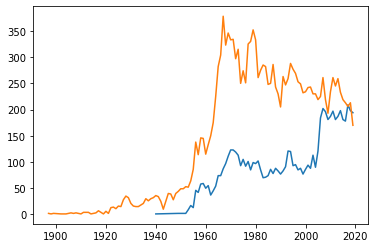

In [12]:
plt.plot(year_dis_album)
plt.plot(year_dis_song)
#orange = songs
#blue = albums

In [13]:
PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    

In [14]:
def make_dictionaries(parent, fileName):
    assert parent in PARENT_GENRES, "The passed name should be a in PARENT_GENRES"
    
    return_dict = {}
        
    f = open(fileName, "r")
    for line in f:
        if line.strip() != "Explore" and line.strip() !="\n" and line.strip() != "":
      
            child_genre = line.strip().lower()
            return_dict[child_genre] = parent
       
            
    return return_dict

        

In [15]:
pop_dict = make_dictionaries("pop", "./data/pop_children.txt")
rock_dict = make_dictionaries("rock", "./data/rock_children.txt")
hip_hop_dict = make_dictionaries("hip hop", "./data/hip_hop_children.txt")
blues_dict = make_dictionaries("blues", "./data/blues_children.txt")
classical_dict = make_dictionaries("classical", "./data/classical_children.txt")
easy_listening_dict = make_dictionaries("easy listening", "./data/easy_listening_children.txt")
edm_dict = make_dictionaries("edm", "./data/edm_children.txt")
folk_dict = make_dictionaries("folk", "./data/folk_children.txt")
jazz_dict = make_dictionaries("jazz", "./data/jazz_children.txt")
latin_dict = make_dictionaries("latin", "./data/latin_children.txt")
metal_dict = make_dictionaries("metal", "./data/metal_children.txt")
new_age_dict = make_dictionaries("new age", "./data/new_age_children.txt")
r_n_b_dict = make_dictionaries("r&b", "./data/r&b_children.txt")
country_dict = make_dictionaries("country", "./data/country_children.txt")
world_dict = make_dictionaries("world", "./data/world_children.txt")

all_genres_dict = {**pop_dict,**rock_dict, **hip_hop_dict, **blues_dict, **classical_dict, 
                   **easy_listening_dict, **edm_dict, **folk_dict, **jazz_dict, **latin_dict,
                  **metal_dict, **new_age_dict, **r_n_b_dict, **country_dict, **world_dict}

In [16]:
def getArtistGenre(genres):
    '''
    This takes a list of possible genres for an artist from the spotify API
    ex. ['adult standards', 'brill building pop', 'easy listening', 'lounge']
    If a parent genre is in the list it will return that as the genre
    Otherwise it will loop through the genres, and analyze the children genres
    The majority parent genre of the children genre will determine the returned genre
    ex. if 5 of 7 genres parent genre is rock, rock will be returned
    '''
    PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    
    returnGenre = ""
    
    #First check to see if a parent genre in list of spotify genres
    num_parents_in_genres = 0
    for g in genres:
        if g in PARENT_GENRES:
            returnGenre = g
            num_parents_in_genres+=1
            
    # Edge case two parent genres in a list (['dance pop', 'edm', 'pop', 'pop dance', 'pop rap'])
    # 1: count all of them and return the parent genre with most child genre
    
    if num_parents_in_genres == 1: #If only one parent genre included, return it
        return returnGenre
        
    #If a parent genre didn't show up OR more than one showed up count all genres
    genre_counts = {'pop':0, 
                    'rock':0, 
                    'hip hop':0, 
                    'latin': 0,
                    'edm': 0,
                    'r&b': 0,
                    'country': 0,
                    'folk': 0,
                    'classical': 0,
                    'metal': 0,
                    'jazz': 0,
                    'new age': 0,
                    'blues': 0,
                    'world': 0,
                    'easy listening': 0}
    
    
    for g in genres:
        try:
            parent = all_genres_dict[g]
            genre_counts[parent]+=1
        except:
            pass
        
    #TODO do we need to think about ties?
    max_genre = "no genre"
    max_genre_count = 0
    for p in PARENT_GENRES:
        if genre_counts[p] > max_genre_count:
            max_genre = p
            max_genre_count = genre_counts[p]
            
    returnGenre = max_genre
           
   
    return returnGenre
    
    

In [22]:
def getMostPopWord(lyrics):
    """
    Gets Called in count lyrics
    """

    text_tokens = word_tokenize(lyrics)
    lyrics_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#     print(lyrics_without_sw)
    
    #I tried this. It seems to have some issues. For example, it converts 'us' to 'u'
    #This may not be the best option to get the most common words if the words aren't clearly recognizable
    
#     #Lemmatize the lyrics 
#     lmtzr = WordNetLemmatizer()
#     lem_lyrics = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
#               for s in lyrics_without_sw]
    
#     lem_lyrics_flat = []
#     for sublist in lem_lyrics:
#         lem_lyrics_flat.extend(sublist)
    
#     print(lem_lyrics_flat)
    
    c = Counter(lyrics_without_sw)
    return c.most_common(10)


def countLyrics(lyrics):
    """
    Takes in the output of 
    "\n \n   <|endoftext|>   \n \n".join([song.lyrics]))
    The first line is always the name of the song and the word lyrics
    There is always a number followed by embed on the last string
    Gets num lyrics, num unique lyrics, and specific word counts
    """
    
    #Remove the first line that has the title of the song and the word 'lyrics'
    split = lyrics.split("\n")
    del split[0]
    lyrics = "\n".join(split)
    
    pattern = r'\d*Embed'
    lyrics = re.sub(pattern, '', lyrics )
    
    pattern = r'You might also like'
    lyrics = re.sub(pattern, '', lyrics )

    
    #Convert to lower and remove non-alphnumeric chars
    lyrics = lyrics.lower()
    lyrics = re.sub(r'\W+', ' ', lyrics)   
    most_common_words = getMostPopWord(lyrics)
    
        
    #Parse most common words
    #get most common words (cw) and common word counts (cwc)
    cw1 = most_common_words[0][0]
    cw1c = most_common_words[0][1]
    
    cw2 = most_common_words[1][0]
    cw2c = most_common_words[1][1]
    
    cw3 = most_common_words[2][0]
    cw3c = most_common_words[2][1]
    
    cw4 = most_common_words[3][0]
    cw4c = most_common_words[3][1]
    
    cw5 = most_common_words[4][0]
    cw5c = most_common_words[4][1]
    
    cw6 = most_common_words[5][0]
    cw6c = most_common_words[5][1]
    
    cw7 = most_common_words[6][0]
    cw7c = most_common_words[6][1]
    
    cw8 = most_common_words[7][0]
    cw8c = most_common_words[7][1]
    
    cw9 = most_common_words[8][0]
    cw9c = most_common_words[8][1]
    
    cw10 = most_common_words[9][0]
    cw10c = most_common_words[9][1]


    #Count number of total lyrics and unique lyrics
    allWords = lyrics.split()
    num_unique = len(np.unique(allWords))
    total_words = len(allWords)
    

    #pattern matching
    
    #***************
    # LOVE
    #***************
    love_pattern = 'lov(e|ing|er|es|ely|ed)\\b'
    love_words = len(re.findall(love_pattern, lyrics))
    
    #***************
    # GOD
    #***************
    god_pattern = 'go(d|ds|ddes)\\b|jesus\\b|christ\\b'
    god_words = len(re.findall(god_pattern, lyrics))
    
    #***************
    # DANCE
    #***************
    dance_pattern = 'danc(e|es|ing|er)\\b'
    dance_words = len(re.findall(dance_pattern, lyrics))
    
    #***************
    # COOL
    #***************
    cool_pattern = 'coo(l|ler|lest)\\b'
    cool_words = len(re.findall(cool_pattern, lyrics))
    
    #***************
    # ROCK
    #***************
    rock_pattern = 'roc(k|ked|kers|ks|ker|king)\\b'
    rock_words = len(re.findall(rock_pattern, lyrics))
    
    #***************
    # SWEAR
    #***************
    swear_pattern = 'dam(n|ns|ned)\\b|fuc(k|ks|ked|ker|kers|king)\\b|shi(t|ty|ts|ting|ter)\\b|hel(l|ls)\\b|bitc(h|hes)\\b|bastar(d|ds)|as(s|es|shole|sholes)\\b'
    swear_words = len(re.findall(swear_pattern, lyrics))
    
    #***************
    # FAMILY
    #***************
    family_pattern = 'fa(m|mily|milies|)\\b|br(o|other|others)\\b|sis(ter|ters)\\b|so(n|ns)\\b|daugh(ter|ters)\\b|husban(d|ds)|wi(fe|ves)\\b|cousi(n|ns)\\b|uncl(e|es)\\b|aun(t|ts|ties)\\b'
    family_words = len(re.findall(family_pattern, lyrics))
    
    #***************
    # BABY
    #***************
    baby_pattern = 'ba(e|be|by|bies)\\b'
    baby_words = len(re.findall(baby_pattern, lyrics))
 

    #***************
    # MONEY
    #***************
    money_pattern = 'money\\b|cash\\b|doll(er|ers|a|az)\\b|buc(k|ks)\\b|coi(n|ns)\\b|bil(l|ls|lz)\\b'
    money_words = len(re.findall(money_pattern, lyrics))
    
    #***************
    # FUNKY
    #***************
    funky_pattern = 'fun(k|ky)\\b'
    funky_words = len(re.findall(funky_pattern, lyrics))
    
    #***************
    # CHILL
    #***************
    chill_pattern = 'chil(l|ls)\\b'
    chill_words = len(re.findall(chill_pattern, lyrics))
    
    
    
    
    
    return num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words,swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c
    
    
    

In [23]:
#Set up genius API
genius = lg.Genius('cPaJbcaz-llZE_G6jO_bHtcPFyJps_aiwumM5pF_xoPIBkmXHifU6lhHcOcbwOlY',  # Client access token from Genius Client API page
                             skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"],
                             remove_section_headers=True, verbose = False)

genius.sleep_time = 15


In [24]:
#Set up spotify API
cid = '2d2d4ac665f543db93244d6799fc01bc'
secret = '43cd8ad30758405fa3291b1b45e944fd'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [25]:
album_num=0
csv_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ ".csv"
csv_fail_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ "_fail.csv"

#csv of failed songs
l = open("./input_data/"+csv_fail_name, "w+")
header = "album|track|artist|year|id|reasonFail\n"
l.write(header)

#csv of completed songs
f = open("./input_data/"+csv_name, "w+")
header = "song|artist|year|genre|numUnique|totalWords|love_words|god_words|dance_words|cool_words|rock_words|swear_words|family_words|baby_words|money_words|funky_words|chill_words|cw1|cwc1|cw2|cwc2|cw3|cwc3|cw4|cwc4|cw5|cwc5|cw6|cwc6|cw7|cwc7|cw8|cwc8|cw9|cwc9|cw10|cwc10\n"
f.write(header)

#Write a row for each song 
for index, row in current_albums.iterrows():
    
    album_num+=1
    cur_artist = row['Artist']
    cur_album = row['Album']
    cur_year = row['Year']
    cur_id = index
    print(f"iter: {album_num}\nsong: {cur_album}\nartist: {cur_artist}\n______________")


    
    #Genius api
    #Get num word, num unique, specific word counts etc.
    retries = 0
    while retries < 3:
        try:
            
            
            #Use genius API 
            album = genius.search_album(cur_album, cur_artist)
        
            #Spotify api
            #Get Genre
            results = sp.search(q=cur_artist, type='artist')
            items = results['artists']['items']
            
            if len(items) > 0:
                cur_artist_genre = getArtistGenre(items[0]['genres'])
            else:
                cur_artist_genre = "no genre"
                
                
            track = 0
            for i in album.tracks:
                track +=1
                cur_lyrics = i.song.lyrics
                
                if len(cur_lyrics.split()) > 15:                    
                    num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words, swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c= countLyrics(cur_lyrics)
                    #If everything works. Write the line to the file
                    line = f"{cur_album}|{cur_artist}|{cur_year}|{cur_artist_genre}|{num_unique}|{total_words}|{love_words}|{god_words}|{dance_words}|{cool_words}|{rock_words}|{swear_words}|{family_words}|{baby_words}|{money_words}|{funky_words}|{chill_words}|{cw1}|{cw1c}|{cw2}|{cw2c}|{cw3}|{cw3c}|{cw4}|{cw4c}|{cw5}|{cw5c}|{cw6}|{cw6c}|{cw7}|{cw7c}|{cw8}|{cw8c}|{cw9}|{cw9c}|{cw10}|{cw10c}\n"
                    f.write(line)
                    
                else:
                    line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|too_few_lyrics\n"
                    l.write(line)
                    

        except Timeout as e:
            retries += 1
            continue
            
        except AttributeError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
        
            


            
        break
        
    if retries == 3: #If we time out 3 times, keep track and move on
        line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
        l.write(line)
        
f.close()
l.close()



iter: 1
song: Pet Sounds
artist: The Beach Boys
______________
lyrics hereWouldn’t It Be Nice Lyrics
Wouldn't it be nice if we were older?
Then we wouldn't have to wait so long
And wouldn't it be nice to live together
In the kind of world where we belong?
You know it's gonna make it that much better
When we can say goodnight and stay together

Wouldn't it be nice if we could wake up
In the morning when the day is new?
After having spent the day together
Hold each other close the whole night through
But happy times together we've been spending
I wish that every kiss was never-ending
Oh, wouldn't it be nice?

Maybe if we think and wish and hope and pray, it might come true
Oh, baby, then there wouldn't be a single thing we couldn't do
Oh, we could be married (Oh, we could be married)
And then we'd be happy (And then we'd be happy)
Oh, wouldn't it be nice?

You know it seems the more we talk about it
It only makes it worse to live without it
But let's talk about it
But wouldn't it be nice

YEREHWE:RLKWJ:WELGKNW:LNGWEEBE
we come on the sloop john b my grandfather and me around nassau town we did roam drinkin all night got into a fight well i feel so broke up i wanna go home so hoist up the john b s sail see how the mainsail sets call for the captain ashore let me go home let me go home i wanna go home yeah yeah well i feel so broke up i wanna go home the first mate he got drunk and broke in the captain s trunk the constable had to come and take him away sheriff john stone why don t you leave me alone yeah yeah well i feel so broke up i wanna go home so hoist up the john b s sail hoist up the john b s sail see how the mainsail sets see how the mainsail sets call for the captain ashore let me go home let me go home i wanna go home let me go home hoist up the john b s sail hoist up the john b hoist up the john b i feel so broke up i wanna go home let me go home the poor cook he caught the fits and threw away all my grits and then he took and he ate up all of my corn let me g

YEREHWE:RLKWJ:WELGKNW:LNGWEEBE
i keep looking for a place to fit in where i can speak my mind and i ve been trying hard to find the people that i won t leave behind they say i got brains but they ain t doing me no good i wish they could each time things start to happen again i think i got something good goin for myself but what goes wrong sometimes i feel very sad cuándo seré sometimes i feel very sad un día seré ain t found the right thing i can put my heart and soul into sometimes i feel very sad oh cuando seré ain t found the right thing i can put my heart and soul into i guess i just wasn t made for these times every time i get the inspiration to go change things around no one wants to help me look for places where new things might be found where can i turn when my fair weather friends cop out what s it all about each time things start to happen again i think i got something good goin for myself but what goes wrong sometimes i feel very sad cuándo seré sometimes i feel very sad un 